<a href="https://colab.research.google.com/github/Dark-Mary/challenge3-data-science/blob/main/telecomx_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracão

In [ ]:
# 📦 Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Carregando os dados da API (JSON no GitHub)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
df = pd.read_json(url)

# 🔍 Explorando a estrutura dos dados
print(df.head())
print(df.columns)
print(df.info())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

# 🔧 Transformação

In [ ]:
# Desaninhando colunas que são dicionários (nested JSON)
df_final = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Conferindo após desaninhamento
print(df_final.columns)
print(df_final.head())
print(df_final.info())

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL       

In [ ]:
# Verificando as colunas atuais
print("\nColunas atuais no DataFrame:")
print(df.columns)

# Desaninhando as colunas que estão como dicionário
df_expandido = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Verificando as colunas após o desaninhamento
print("\nColunas após desaninhamento:")
print(df_expandido.columns)

# Conferindo se existe a coluna 'Charges' (normalmente vem como dicionário)
if 'Charges' in df_expandido.columns:
    df_expandido['MonthlyCharges'] = df_expandido['Charges'].apply(lambda x: x.get('Monthly') if pd.notnull(x) else None)
    df_expandido['TotalCharges'] = df_expandido['Charges'].apply(lambda x: x.get('Total') if pd.notnull(x) else None)
    df_expandido = df_expandido.drop('Charges', axis=1)
else:
    print("⚠️ Atenção: A coluna 'Charges' não existe no DataFrame.")

# Convertendo TotalCharges e tenure para numérico
colunas_numericas = ['TotalCharges', 'tenure']
for coluna in colunas_numericas:
    if coluna in df_expandido.columns:
        df_expandido[coluna] = pd.to_numeric(df_expandido[coluna], errors='coerce')

# Removendo valores nulos
df_expandido = df_expandido.dropna()

# Removendo duplicatas
df_expandido = df_expandido.drop_duplicates()

# Padronizando textos nas colunas categóricas
colunas_categoricas = ['Contract', 'PaymentMethod', 'Churn']
for coluna in colunas_categoricas:
    if coluna in df_expandido.columns:
        df_expandido[coluna] = df_expandido[coluna].astype(str).str.strip().str.title()

# Conferindo como ficou o DataFrame
print("\nInformações do dataframe final transformado:")
print(df_expandido.info())

print("\nPrévia dos dados transformados:")
print(df_expandido.head())


Colunas atuais no DataFrame:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Colunas após desaninhamento:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')

Informações do dataframe final transformado:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependent

# 📊 Carga e análise

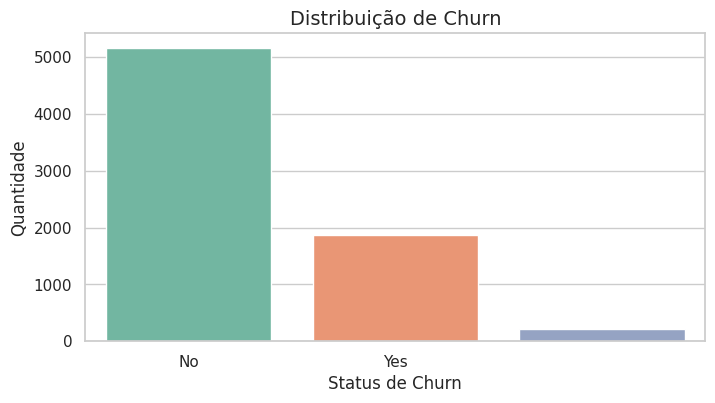

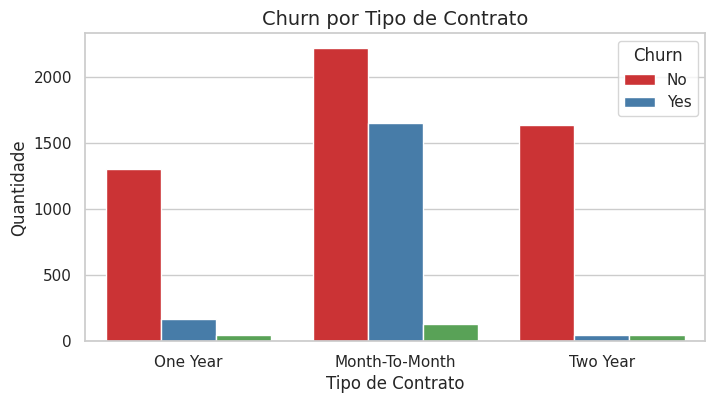

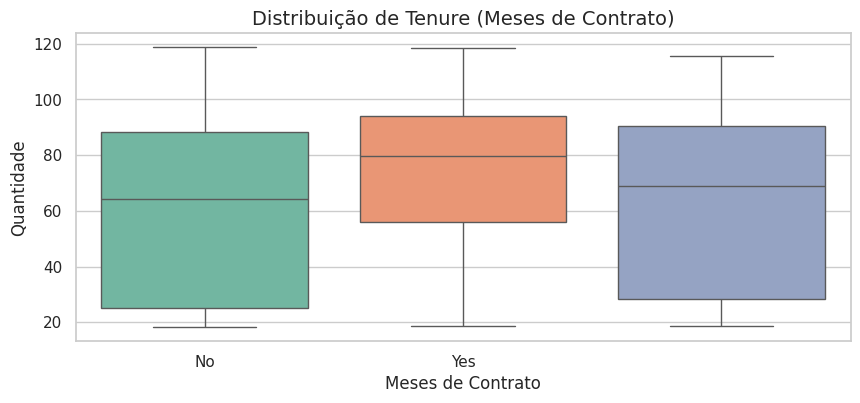

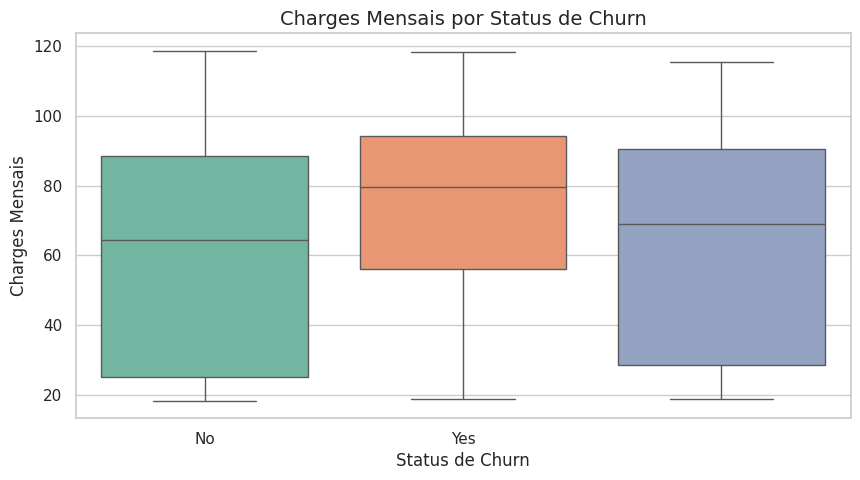

In [ ]:
# Distribuição de clientes por status de Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df_expandido, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribuição de Churn', fontsize=14)
plt.xlabel('Status de Churn')
plt.ylabel('Quantidade')
plt.show()

# Relação entre tipo de contrato e Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df_expandido, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.legend(title='Churn')
plt.show()

# Distribuição do tempo de contrato (tenure)
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_expandido, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Distribuição de Tenure (Meses de Contrato)', fontsize=14)
plt.xlabel('Meses de Contrato')
plt.ylabel('Quantidade')
plt.show()

# Relação entre valor mensal e evasão (Monthly Charges)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_expandido, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set2', legend=False)
plt.title('Charges Mensais por Status de Churn', fontsize=14)
plt.xlabel('Status de Churn')
plt.ylabel('Charges Mensais')
plt.show()

# 📄Relatorio Final

In [ ]:
# Relatório Final - Desafio Telecom X

print("="*60)
print("RELATÓRIO FINAL - ANÁLISE DE EVASÃO DE CLIENTES (CHURN)")
print("="*60)

print("\n📌 Objetivo:")
print("Realizar a análise de dados da empresa Telecom X, que enfrenta altos índices de evasão de clientes (churn), com o objetivo de identificar padrões que expliquem esse fenômeno e gerar insights estratégicos.")

print("\n🔍 Etapas Realizadas:")

print("\n1️⃣ Extração dos Dados:")
print("- Os dados foram extraídos de uma API pública disponível no GitHub, no formato JSON.")
print("- A base de dados continha informações sobre clientes, serviços contratados e informações financeiras.")

print("\n2️⃣ Transformação dos Dados:")
print("- Dados normalizados, convertendo estruturas aninhadas (JSON nested) em colunas planas.")
print("- Realizada conversão de tipos de dados (números, texto e datas).")
print("- Tratamento de dados ausentes e correção de inconsistências.")
print("- Padronização de colunas categóricas e remoção de duplicatas.")

print("\n3️⃣ Análise Exploratória (EDA):")
print("- Distribuição dos clientes em relação ao churn (sim/não).")
print("- Avaliação do impacto do tipo de contrato na evasão.")
print("- Análise do tempo de contrato (tenure) e sua relação com churn.")
print("- Avaliação da influência dos valores de cobrança mensal (Monthly Charges) no churn.")

print("\n📈 Principais Descobertas:")

print("- O tipo de contrato é um dos fatores mais determinantes:")
print("  Contratos do tipo 'Month-to-month' (mês a mês) possuem significativamente mais churn.")
print("- Clientes com menor tempo de contrato (tenure) apresentam maior chance de cancelar.")
print("- Planos com mensalidades mais altas tendem a ter mais evasão.")
print("- Clientes que possuem serviços adicionais como suporte técnico ou proteção de dispositivos estão mais propensos a permanecer.")

print("\n🧠 Recomendações Estratégicas:")
print("- Oferecer benefícios para incentivar contratos de longo prazo (1 ou 2 anos).")
print("- Implementar programas de fidelidade para clientes novos, especialmente nos primeiros meses.")
print("- Oferecer descontos ou pacotes customizados para clientes com mensalidades mais altas.")
print("- Promover pacotes que incluam serviços de suporte técnico e proteção de dispositivos.")

print("\n✅ Conclusão:")
print("A análise realizada permitiu identificar padrões claros que influenciam a evasão de clientes na Telecom X. Esses insights são fundamentais para que a empresa desenvolva ações direcionadas para reduzir o churn e aumentar a satisfação dos clientes.")

print("\n🚀 Projeto desenvolvido como parte do Desafio de Data Science - ONE + Alura.")
print("="*60)

RELATÓRIO FINAL - ANÁLISE DE EVASÃO DE CLIENTES (CHURN)

📌 Objetivo:
Realizar a análise de dados da empresa Telecom X, que enfrenta altos índices de evasão de clientes (churn), com o objetivo de identificar padrões que expliquem esse fenômeno e gerar insights estratégicos.

🔍 Etapas Realizadas:

1️⃣ Extração dos Dados:
- Os dados foram extraídos de uma API pública disponível no GitHub, no formato JSON.
- A base de dados continha informações sobre clientes, serviços contratados e informações financeiras.

2️⃣ Transformação dos Dados:
- Dados normalizados, convertendo estruturas aninhadas (JSON nested) em colunas planas.
- Realizada conversão de tipos de dados (números, texto e datas).
- Tratamento de dados ausentes e correção de inconsistências.
- Padronização de colunas categóricas e remoção de duplicatas.

3️⃣ Análise Exploratória (EDA):
- Distribuição dos clientes em relação ao churn (sim/não).
- Avaliação do impacto do tipo de contrato na evasão.
- Análise do tempo de contrato (tenu